<a href="https://colab.research.google.com/github/NeethuVenugopal/AIQ-challenge1/blob/main/spi_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df1 = pd.read_csv('dbextract1_spi.csv')
df2 = pd.read_csv('dbextract1_ranked_cumspi.csv')

In [2]:
df1.head()

,brand,date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_spi
0,BMW,2023-11-30,13,37,0.480000,37,13,0.480000
1,BMW,2023-12-01,9,60,0.739130,97,22,0.630252
2,BMW,2023-12-02,13,46,0.559322,143,35,0.606742
3,BMW,2023-12-03,2,68,0.942857,211,37,0.701613
4,BMW,2023-12-04,10,61,0.718310,272,47,0.705329


In [3]:
df2.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_spi
0,BMW,2023-12-07,2.136451,88.182630,0.952691,88.182630,2.136451,0.952691
1,BMW,2023-12-08,3.432146,36.184175,0.826731,124.366805,5.568598,0.914287
2,BMW,2023-12-09,0.649676,188.473939,0.993130,312.840743,6.218274,0.961021
3,BMW,2023-12-10,3.636968,5.349139,0.190535,318.189883,9.855242,0.939915
4,BMW,2023-12-11,8.418213,194.861064,0.917176,513.050947,18.273455,0.931215


In [4]:
new_column_names = {'negative': 'R_negative',
                    'positive': 'R_positive',
                    'spi': 'R_spi',
                    'cumulative_positive' : 'R_cumpos',
                    'cumulative_negative' : 'R_cumneg',
                    'cum_spi' : 'R_cumspi'}
df2.rename(columns=new_column_names, inplace=True)
df2.head()

,brand,created_date,R_negative,R_positive,R_spi,R_cumpos,R_cumneg,R_cumspi
0,BMW,2023-12-07,2.136451,88.182630,0.952691,88.182630,2.136451,0.952691
1,BMW,2023-12-08,3.432146,36.184175,0.826731,124.366805,5.568598,0.914287
2,BMW,2023-12-09,0.649676,188.473939,0.993130,312.840743,6.218274,0.961021
3,BMW,2023-12-10,3.636968,5.349139,0.190535,318.189883,9.855242,0.939915
4,BMW,2023-12-11,8.418213,194.861064,0.917176,513.050947,18.273455,0.931215


In [6]:
df2.to_csv('dbextract_ranked_cumspi_v2.csv', index = False)

In [8]:
df2.shape

(40, 8)

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

# Filter rows based on the condition (created_date below 7 Dec 2023)
condition = df1['date'] >= '2023-12-07'
df1_filtered = df1[condition]
df1_filtered.head()

,brand,date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_spi
7,BMW,2023-12-07,13,42,0.527273,426,70,0.717742
8,BMW,2023-12-08,10,29,0.487179,455,80,0.700935
9,BMW,2023-12-09,8,57,0.753846,512,88,0.706667
10,BMW,2023-12-10,5,17,0.545455,529,93,0.700965
11,BMW,2023-12-11,14,33,0.404255,562,107,0.680120


In [12]:
df1_filtered = df1_filtered.sort_values(by=['brand', 'date'])

# Calculate cumulative positive and cumulative negative
df1_filtered['cumulative_positive'] = df1_filtered.groupby('brand')['positive'].cumsum()
df1_filtered['cumulative_negative'] = df1_filtered.groupby('brand')['negative'].cumsum()

df1_filtered['cum_SPI'] = (df1_filtered['cumulative_positive'] - df1_filtered['cumulative_negative'])/(df1_filtered['cumulative_positive'] + df1_filtered['cumulative_negative'])

# Display the resulting DataFrame
df1_filtered.head()

,brand,date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_spi,cum_SPI
7,BMW,2023-12-07,13,42,0.527273,42,13,0.717742,0.527273
8,BMW,2023-12-08,10,29,0.487179,71,23,0.700935,0.510638
9,BMW,2023-12-09,8,57,0.753846,128,31,0.706667,0.610063
10,BMW,2023-12-10,5,17,0.545455,145,36,0.700965,0.602210
11,BMW,2023-12-11,14,33,0.404255,178,50,0.680120,0.561404


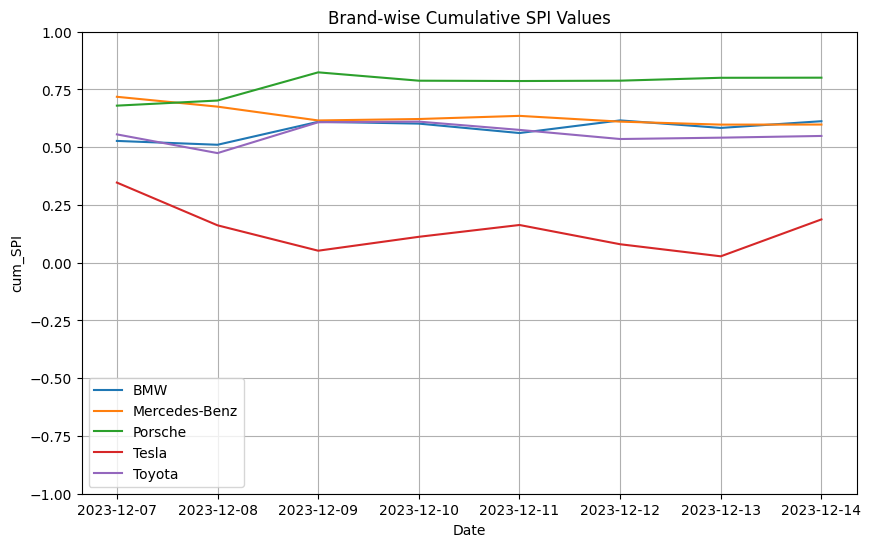

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Loop through each unique brand in the DataFrame
for brand in df1_filtered['brand'].unique():
    brand_data = df1_filtered[df1_filtered['brand'] == brand]
    plt.plot(brand_data['date'], brand_data['cum_SPI'], label=brand)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('cum_SPI')
plt.title('Brand-wise Cumulative SPI Values')
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)

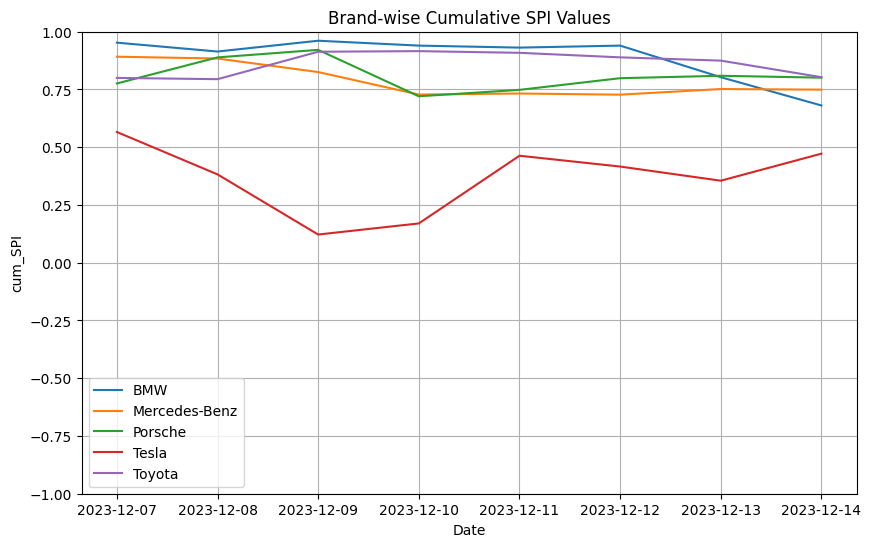

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Loop through each unique brand in the DataFrame
for brand in df2['brand'].unique():
    brand_data = df2[df2['brand'] == brand]
    plt.plot(brand_data['created_date'], brand_data['R_cumspi'], label=brand)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('cum_SPI')
plt.title('Brand-wise Cumulative SPI Values')
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)

In [17]:
df1_filtered.rename(columns={'date': 'created_date'}, inplace=True)
df1_filtered.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_spi,cum_SPI
7,BMW,2023-12-07,13,42,0.527273,42,13,0.717742,0.527273
8,BMW,2023-12-08,10,29,0.487179,71,23,0.700935,0.510638
9,BMW,2023-12-09,8,57,0.753846,128,31,0.706667,0.610063
10,BMW,2023-12-10,5,17,0.545455,145,36,0.700965,0.602210
11,BMW,2023-12-11,14,33,0.404255,178,50,0.680120,0.561404


In [20]:
df1_filtered['created_date'] = pd.to_datetime(df1_filtered['created_date'])
df2['created_date'] = pd.to_datetime(df2['created_date'])

merged_df = pd.merge(df1_filtered, df2, on=['brand','created_date'])
merged_df.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_spi,cum_SPI,R_negative,R_positive,R_spi,R_cumpos,R_cumneg,R_cumspi
0,BMW,2023-12-07,13,42,0.527273,42,13,0.717742,0.527273,2.136451,88.182630,0.952691,88.182630,2.136451,0.952691
1,BMW,2023-12-08,10,29,0.487179,71,23,0.700935,0.510638,3.432146,36.184175,0.826731,124.366805,5.568598,0.914287
2,BMW,2023-12-09,8,57,0.753846,128,31,0.706667,0.610063,0.649676,188.473939,0.993130,312.840743,6.218274,0.961021
3,BMW,2023-12-10,5,17,0.545455,145,36,0.700965,0.602210,3.636968,5.349139,0.190535,318.189883,9.855242,0.939915
4,BMW,2023-12-11,14,33,0.404255,178,50,0.680120,0.561404,8.418213,194.861064,0.917176,513.050947,18.273455,0.931215


In [22]:
merged_df.shape

(40, 15)

In [23]:
merged_df.drop(columns=['cum_spi'], inplace=True)
merged_df.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_SPI,R_negative,R_positive,R_spi,R_cumpos,R_cumneg,R_cumspi
0,BMW,2023-12-07,13,42,0.527273,42,13,0.527273,2.136451,88.182630,0.952691,88.182630,2.136451,0.952691
1,BMW,2023-12-08,10,29,0.487179,71,23,0.510638,3.432146,36.184175,0.826731,124.366805,5.568598,0.914287
2,BMW,2023-12-09,8,57,0.753846,128,31,0.610063,0.649676,188.473939,0.993130,312.840743,6.218274,0.961021
3,BMW,2023-12-10,5,17,0.545455,145,36,0.602210,3.636968,5.349139,0.190535,318.189883,9.855242,0.939915
4,BMW,2023-12-11,14,33,0.404255,178,50,0.561404,8.418213,194.861064,0.917176,513.050947,18.273455,0.931215


In [24]:
stock_df = pd.read_csv('stock_data_december_2023.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol,brand
0,2023-11-30,96.500000,96.940002,95.559998,95.589996,95.589996,2861028,BMW.DE,BMW
1,2023-12-01,95.940002,96.190002,95.169998,96.190002,96.190002,731827,BMW.DE,BMW
2,2023-12-04,95.959999,96.419998,94.730003,96.160004,96.160004,850657,BMW.DE,BMW
3,2023-12-05,96.199997,97.660004,96.010002,97.660004,97.660004,931765,BMW.DE,BMW
4,2023-12-06,97.989998,99.820000,97.610001,99.349998,99.349998,1088946,BMW.DE,BMW


In [28]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Filter rows based on the condition (created_date below 7 Dec 2023)
condition = (stock_df['Date'] >= '2023-12-07') & (stock_df['Date'] < '2023-12-15')
stock_df_f = stock_df[condition]
stock_df_f.head()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol,brand
5,2023-12-07,99.059998,99.220001,98.360001,98.599998,98.599998,920498,BMW.DE,BMW
6,2023-12-08,98.650002,101.559998,98.540001,100.919998,100.919998,1436380,BMW.DE,BMW
7,2023-12-11,100.900002,101.860001,100.440002,101.300003,101.300003,934467,BMW.DE,BMW
8,2023-12-12,101.660004,102.160004,100.940002,100.940002,100.940002,965724,BMW.DE,BMW
9,2023-12-13,100.919998,101.239998,99.690002,99.690002,99.690002,800108,BMW.DE,BMW


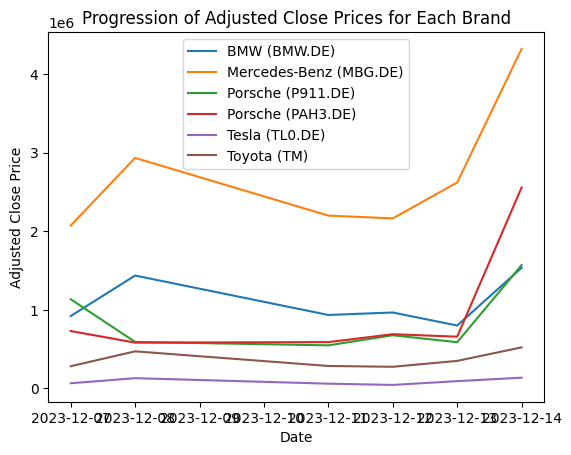

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the brands with their respective brandname and brandsymbol
brands = [
    {'brandname': 'BMW', 'brandsymbol': 'BMW.DE'},
    {'brandname': 'Mercedes-Benz', 'brandsymbol': 'MBG.DE'},
    {'brandname': 'Porsche', 'brandsymbol': 'P911.DE'},
    {'brandname': 'Porsche', 'brandsymbol': 'PAH3.DE'},
    {'brandname': 'Tesla', 'brandsymbol': 'TL0.DE'},
    # {'brandname': 'Tesla', 'brandsymbol': 'TSLA'},
    {'brandname': 'Toyota', 'brandsymbol': 'TM'}
]

# Plotting the progression of Adj. Close for each brandname and brandsymbol
for brand in brands:
    subset_data = stock_df_f[(stock_df_f['brand'] == brand['brandname']) & (stock_df_f['symbol'] == brand['brandsymbol'])]
    plt.plot(subset_data['Date'], subset_data['Volume'], label=f"{brand['brandname']} ({brand['brandsymbol']})")

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Progression of Adjusted Close Prices for Each Brand')
plt.legend()
plt.show()

In [33]:

values_to_delete = ['PAH3.DE', 'TSLA']
condition = stock_df_f['symbol'].isin(values_to_delete)
stock_df_f = stock_df_f[~condition]
stock_df_f.head()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol,brand
5,2023-12-07,99.059998,99.220001,98.360001,98.599998,98.599998,920498,BMW.DE,BMW
6,2023-12-08,98.650002,101.559998,98.540001,100.919998,100.919998,1436380,BMW.DE,BMW
7,2023-12-11,100.900002,101.860001,100.440002,101.300003,101.300003,934467,BMW.DE,BMW
8,2023-12-12,101.660004,102.160004,100.940002,100.940002,100.940002,965724,BMW.DE,BMW
9,2023-12-13,100.919998,101.239998,99.690002,99.690002,99.690002,800108,BMW.DE,BMW


In [35]:
stock_df_f.rename(columns={'Date': 'created_date'}, inplace=True)
stock_df_f.head()

,created_date,Open,High,Low,Close,Adj Close,Volume,symbol,brand
5,2023-12-07,99.059998,99.220001,98.360001,98.599998,98.599998,920498,BMW.DE,BMW
6,2023-12-08,98.650002,101.559998,98.540001,100.919998,100.919998,1436380,BMW.DE,BMW
7,2023-12-11,100.900002,101.860001,100.440002,101.300003,101.300003,934467,BMW.DE,BMW
8,2023-12-12,101.660004,102.160004,100.940002,100.940002,100.940002,965724,BMW.DE,BMW
9,2023-12-13,100.919998,101.239998,99.690002,99.690002,99.690002,800108,BMW.DE,BMW


In [37]:
merged_df['created_date'] = pd.to_datetime(merged_df['created_date'])
stock_df_f['created_date'] = pd.to_datetime(stock_df_f['created_date'])

# Merge dataframes and fill missing values with null
stock_merged_df = pd.merge(merged_df, stock_df_f, on=['created_date', 'brand'], how='left')
stock_merged_df.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_SPI,R_negative,R_positive,...,R_cumpos,R_cumneg,R_cumspi,Open,High,Low,Close,Adj Close,Volume,symbol
0,BMW,2023-12-07,13,42,0.527273,42,13,0.527273,2.136451,88.182630,...,88.182630,2.136451,0.952691,99.059998,99.220001,98.360001,98.599998,98.599998,920498.0,BMW.DE
1,BMW,2023-12-08,10,29,0.487179,71,23,0.510638,3.432146,36.184175,...,124.366805,5.568598,0.914287,98.650002,101.559998,98.540001,100.919998,100.919998,1436380.0,BMW.DE
2,BMW,2023-12-09,8,57,0.753846,128,31,0.610063,0.649676,188.473939,...,312.840743,6.218274,0.961021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW,2023-12-10,5,17,0.545455,145,36,0.602210,3.636968,5.349139,...,318.189883,9.855242,0.939915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMW,2023-12-11,14,33,0.404255,178,50,0.561404,8.418213,194.861064,...,513.050947,18.273455,0.931215,100.900002,101.860001,100.440002,101.300003,101.300003,934467.0,BMW.DE


In [46]:
stock_merged_df['created_date'] = pd.to_datetime(stock_merged_df['created_date'])

# Set 'date' as the index
stock_merged_df.set_index(['brand', 'created_date'], inplace=True)

# Interpolate missing values
df_interpolated = stock_merged_df.interpolate(method='linear')

# Reset index to have 'date' as a regular column
df_interpolated.reset_index(inplace=True)
stock_merged_df.reset_index(inplace= True)
df_interpolated.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_SPI,R_negative,R_positive,...,R_cumpos,R_cumneg,R_cumspi,Open,High,Low,Close,Adj Close,Volume,symbol
0,BMW,2023-12-07,13,42,0.527273,42,13,0.527273,2.136451,88.182630,...,88.182630,2.136451,0.952691,99.059998,99.220001,98.360001,98.599998,98.599998,9.204980e+05,BMW.DE
1,BMW,2023-12-08,10,29,0.487179,71,23,0.510638,3.432146,36.184175,...,124.366805,5.568598,0.914287,98.650002,101.559998,98.540001,100.919998,100.919998,1.436380e+06,BMW.DE
2,BMW,2023-12-09,8,57,0.753846,128,31,0.610063,0.649676,188.473939,...,312.840743,6.218274,0.961021,99.400002,101.659999,99.173335,101.046666,101.046666,1.269076e+06,NaN
3,BMW,2023-12-10,5,17,0.545455,145,36,0.602210,3.636968,5.349139,...,318.189883,9.855242,0.939915,100.150002,101.760000,99.806669,101.173335,101.173335,1.101771e+06,NaN
4,BMW,2023-12-11,14,33,0.404255,178,50,0.561404,8.418213,194.861064,...,513.050947,18.273455,0.931215,100.900002,101.860001,100.440002,101.300003,101.300003,9.344670e+05,BMW.DE


In [47]:
df_interpolated[-5:]

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_SPI,R_negative,R_positive,...,R_cumpos,R_cumneg,R_cumspi,Open,High,Low,Close,Adj Close,Volume,symbol
35,Toyota,2023-12-10,11,47,0.620690,207,50,0.610895,0.980609,30.844281,...,292.116127,12.810870,0.915974,186.599996,187.670003,186.053335,187.146667,187.146667,346766.666667,NaN
36,Toyota,2023-12-11,18,45,0.428571,252,68,0.575000,2.576477,29.469019,...,321.585146,15.387346,0.908673,186.809998,187.710007,186.279999,187.080002,187.080002,284600.000000,TM
37,Toyota,2023-12-12,17,29,0.260870,281,85,0.535519,3.752973,4.343078,...,325.928224,19.140319,0.889064,184.759995,185.210007,184.050003,184.800003,184.800003,274300.000000,TM
38,Toyota,2023-12-13,12,45,0.578947,326,97,0.541371,3.371468,11.480413,...,337.408637,22.511787,0.874907,184.009995,186.289993,183.029999,185.479996,185.479996,349500.000000,TM
39,Toyota,2023-12-14,14,55,0.594203,381,111,0.548780,16.243625,17.638055,...,355.046692,38.755412,0.803173,181.880005,184.770004,181.610001,183.419998,183.419998,521500.000000,TM


In [61]:

import numpy as np


# Function to calculate similarity metric
def calculate_similarity(group):
    cross_corr = np.correlate(group['Volume'].fillna(0), group['cumspi'].fillna(0), mode='same')
    return cross_corr.mean() # You may choose other metrics based on your needs

# Group by 'brand' and apply the similarity calculation function
similarity_results = df_interpolated.groupby('brand').apply(calculate_similarity)

# Display the similarity results
print("\nSimilarity Results:")
print(similarity_results)



Similarity Results:
brand
BMW              3.842306e+06
Mercedes-Benz    8.929829e+06
Porsche          3.410341e+06
Tesla            7.584849e+04
Toyota           1.128905e+06
dtype: float64


In [66]:
# Convert 'created_date' to datetime format
df_interpolated['created_date'] = pd.to_datetime(df_interpolated['created_date'])

# Sort DataFrame by 'brand' and 'created_date'
df_interpolated.sort_values(['brand', 'created_date'], inplace=True)

# Calculate the difference between 'Adj Close' and its previous day's value for each brand
df_interpolated['Adj_Close_Diff'] = df_interpolated.groupby('brand')['Adj Close'].diff()
df_interpolated['Volume_Diff'] = df_interpolated.groupby('brand')['Volume'].diff()
# Reset index for better display (optional)
df_interpolated.reset_index(drop=True, inplace=True)

columns_to_fill_zero = ['Adj_Close_Diff', 'Volume_Diff']
df_interpolated[columns_to_fill_zero] = df_interpolated[columns_to_fill_zero].fillna(0)

df_interpolated.sort_values(['brand', 'created_date'], inplace=True)

# Calculate the cumulative sum of 'Adj_Close_Diff' for each brand on each date
df_interpolated['cum_closediff'] = df_interpolated.groupby(['brand'])['Adj_Close_Diff'].cumsum()
df_interpolated['cum_volumediff'] = df_interpolated.groupby(['brand'])['Volume_Diff'].cumsum()
# Reset index for better display (optional)
df_interpolated.reset_index(drop=True, inplace=True)
df_interpolated.head()

,brand,created_date,negative,positive,spi,cumulative_positive,cumulative_negative,cum_SPI,R_negative,R_positive,...,High,Low,Close,Adj Close,Volume,symbol,Adj_Close_Diff,Volume_Diff,cum_closediff,cum_volumediff
0,BMW,2023-12-07,13,42,0.527273,42,13,0.527273,2.136451,88.182630,...,99.220001,98.360001,98.599998,98.599998,9.204980e+05,BMW.DE,0.000000,0.000000,0.000000,0.000000
1,BMW,2023-12-08,10,29,0.487179,71,23,0.510638,3.432146,36.184175,...,101.559998,98.540001,100.919998,100.919998,1.436380e+06,BMW.DE,2.320000,515882.000000,2.320000,515882.000000
2,BMW,2023-12-09,8,57,0.753846,128,31,0.610063,0.649676,188.473939,...,101.659999,99.173335,101.046666,101.046666,1.269076e+06,NaN,0.126668,-167304.333333,2.446668,348577.666667
3,BMW,2023-12-10,5,17,0.545455,145,36,0.602210,3.636968,5.349139,...,101.760000,99.806669,101.173335,101.173335,1.101771e+06,NaN,0.126668,-167304.333333,2.573336,181273.333333
4,BMW,2023-12-11,14,33,0.404255,178,50,0.561404,8.418213,194.861064,...,101.860001,100.440002,101.300003,101.300003,9.344670e+05,BMW.DE,0.126668,-167304.333333,2.700005,13969.000000


In [67]:
df_interpolated.to_csv('input_2_similaritymetrics.csv', index = False)

In [79]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('input_2_similaritymetrics.csv')

result_dict = {'brand': df['brand'].unique()}

columns = [{'rangecol' : 'spi', 'columns_to_scale' : ['Adj_Close_Diff', 'Volume_Diff']},
           {'rangecol' : 'R_spi', 'columns_to_scale' : ['Adj_Close_Diff', 'Volume_Diff']},
           {'rangecol' : 'cum_SPI', 'columns_to_scale' : ['cum_closediff', 'cum_volumediff']},
           {'rangecol' : 'R_cumspi', 'columns_to_scale' : ['cum_closediff', 'cum_volumediff']}]
# Columns to be scaled

def calculate_similarity(group, data):
    close_cross_corr = np.correlate(group[data['rangecol']].fillna(0), group[data['columns_to_scale'][0]].fillna(0), mode='same')
    vol_cross_corr = np.correlate(group[data['rangecol']].fillna(0), group[data['columns_to_scale'][1]].fillna(0), mode='same')
    return pd.Series({
        f'{data["rangecol"]}_close_corr': close_cross_corr.mean(),
        f'{data["rangecol"]}_volume_corr': vol_cross_corr.mean()
    })

for col in columns:
  df_copy = df.copy()
  series1 = col['rangecol']
  columns_to_scale = col['columns_to_scale']
  scaler = MinMaxScaler(feature_range=(min(df_copy[col['rangecol']]), max(df_copy[col['rangecol']])))
  df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])
  similarity_results = df_copy.groupby('brand').apply(calculate_similarity, data=col)
  result_dict.update(similarity_results)
  print(result_dict)
# Display the scaled DataFrame
merged_df = pd.DataFrame(result_dict)

# Display the result DataFrame
print("Merged DataFrame:")
merged_df.head()



{'brand': array(['BMW', 'Mercedes-Benz', 'Porsche', 'Tesla', 'Toyota'], dtype=object), 'spi_close_corr': brand
BMW              0.151797
Mercedes-Benz    0.090267
Porsche          0.013522
Tesla            0.050202
Toyota          -0.115440
Name: spi_close_corr, dtype: float64, 'spi_volume_corr': brand
BMW             -0.034829
Mercedes-Benz    0.316998
Porsche         -0.014252
Tesla           -0.022160
Toyota          -0.066158
Name: spi_volume_corr, dtype: float64}
{'brand': array(['BMW', 'Mercedes-Benz', 'Porsche', 'Tesla', 'Toyota'], dtype=object), 'spi_close_corr': brand
BMW              0.151797
Mercedes-Benz    0.090267
Porsche          0.013522
Tesla            0.050202
Toyota          -0.115440
Name: spi_close_corr, dtype: float64, 'spi_volume_corr': brand
BMW             -0.034829
Mercedes-Benz    0.316998
Porsche         -0.014252
Tesla           -0.022160
Toyota          -0.066158
Name: spi_volume_corr, dtype: float64, 'R_spi_close_corr': brand
BMW             -0.275600
Me

,brand,spi_close_corr,spi_volume_corr,R_spi_close_corr,R_spi_volume_corr,cum_SPI_close_corr,cum_SPI_volume_corr,R_cumspi_close_corr,R_cumspi_volume_corr
brand,,,,,,,,,
BMW,BMW,0.151797,-0.034829,-0.275600,-0.565464,2.574414,0.845403,4.734378,1.897929
Mercedes-Benz,Mercedes-Benz,0.090267,0.316998,-0.363221,-0.055927,2.476963,1.323069,3.661157,2.150908
Porsche,Porsche,0.013522,-0.014252,-0.489125,-0.532916,2.884922,0.377507,3.622798,0.857725
Tesla,Tesla,0.050202,-0.022160,-0.168306,-0.321948,0.418487,0.161190,1.282781,0.632586
Toyota,Toyota,-0.115440,-0.066158,-0.669580,-0.596625,1.489537,0.722379,2.917420,1.665680


In [62]:
import pandas as pd

# Assuming df is your DataFrame
# Sample data creation
data = {'brand': ['A', 'A', 'A', 'B', 'B', 'B'],
        'created_date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-01', '2023-01-02', '2023-01-03']),
        'Adj Close': [100, 105, 110, 200, 205, 210]}
df = pd.DataFrame(data)

# Convert 'created_date' to datetime format
df['created_date'] = pd.to_datetime(df['created_date'])

# Sort DataFrame by 'brand' and 'created_date'
df.sort_values(['brand', 'created_date'], inplace=True)

# Calculate the difference between 'Adj Close' and its previous day's value for each brand
df['Adj_Close_Diff'] = df.groupby('brand')['Adj Close'].diff()

# Reset index for better display (optional)
df.reset_index(drop=True, inplace=True)

# Display the DataFrame with the new column
print("DataFrame with Difference Column:")
print(df)


DataFrame with Difference Column:
  brand created_date  Adj Close  Adj_Close_Diff
0     A   2023-01-01        100             NaN
1     A   2023-01-02        105             5.0
2     A   2023-01-03        110             5.0
3     B   2023-01-01        200             NaN
4     B   2023-01-02        205             5.0
5     B   2023-01-03        210             5.0
